In this project we will implement a deep learning model with Tensorflow and Keras and use Convolution Neural Network technique enhancing our model on the MNIST dataset. 

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

2023-01-27 23:32:17.552006: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
## we have prepared the datasets and loaded it in our directory as a numpy file 
x_train = np.load('x_train.npy')
x_test = np.load('x_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [21]:
## Let's check the shape our train model
np.shape(x_train)

(60000, 28, 28)

In [22]:
## first let's normalize the X_train and X_test by dividing them by 255 
x_train = x_train / 255
x_test = x_test / 255

In [23]:
## we should add on dimension to the x_train and x_test matrices
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [24]:
np.shape(x_train)

(60000, 28, 28, 1)

In [25]:
x_train[1000]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

## Modeling 
we will use the following diagram for creating our CNN model 

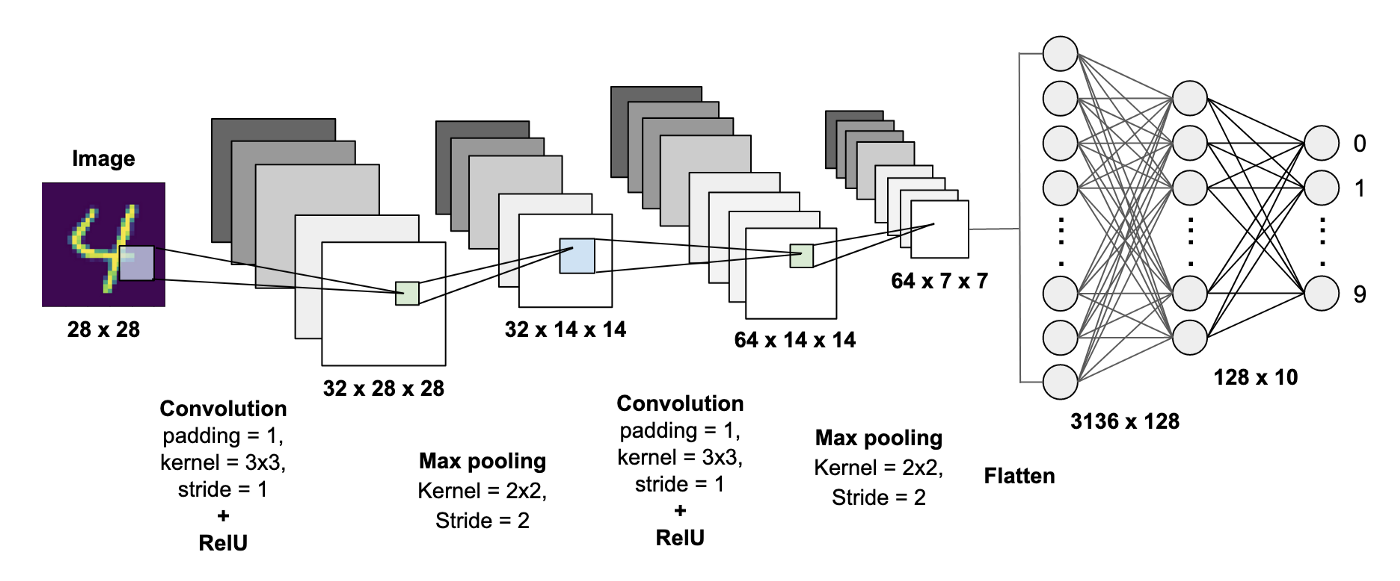

In [26]:
## Let's build our CNN model :

model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

2023-01-27 23:47:49.852901: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
## Let's see the summary of our model and parameters it contains 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 30, 30, 1)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                        

In [28]:
## Now that we have built our model let's compile it (optimization : adams  , loss :categorical_crossentropy , metrics : accuracy )
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
## since our predictions are numbers we need to convert them to matrix 
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [30]:
## let's check if that is correct :
y_train_ohe[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [31]:
### Now we can fit our model ( we will use 300 batches and 10 epches)
history = model.fit(x_train, y_train_ohe, epochs=10, validation_data=(x_test, y_test_ohe), batch_size=300)

Epoch 1/10
200/200 [==============================] - 36s 172ms/step - loss: 0.3002 - accuracy: 0.9136 - val_loss: 0.0733 - val_accuracy: 0.9772
Epoch 2/10
200/200 [==============================] - 33s 164ms/step - loss: 0.0657 - accuracy: 0.9801 - val_loss: 0.0508 - val_accuracy: 0.9814
Epoch 3/10
200/200 [==============================] - 33s 165ms/step - loss: 0.0448 - accuracy: 0.9870 - val_loss: 0.0387 - val_accuracy: 0.9860
Epoch 4/10
200/200 [==============================] - 33s 167ms/step - loss: 0.0367 - accuracy: 0.9887 - val_loss: 0.0344 - val_accuracy: 0.9881
Epoch 5/10
200/200 [==============================] - 33s 164ms/step - loss: 0.0292 - accuracy: 0.9911 - val_loss: 0.0269 - val_accuracy: 0.9903
Epoch 6/10
200/200 [==============================] - 33s 165ms/step - loss: 0.0228 - accuracy: 0.9928 - val_loss: 0.0279 - val_accuracy: 0.9903
Epoch 7/10
200/200 [==============================] - 33s 164ms/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.0303 - val_ac

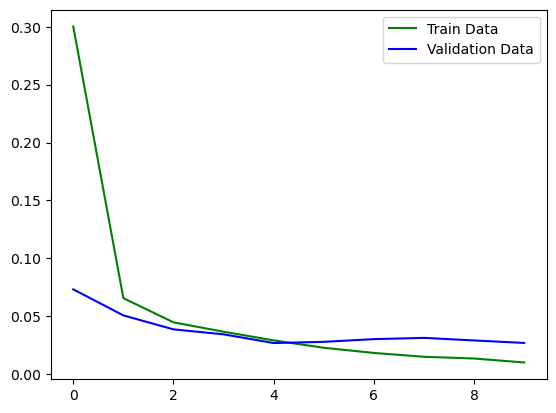

In [33]:
### Now let's plot The Loss of the train and validation in each epoch 
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='green', label='Train Data')
plt.plot(history.history['val_loss'], color='blue', label='Validation Data')
plt.legend()

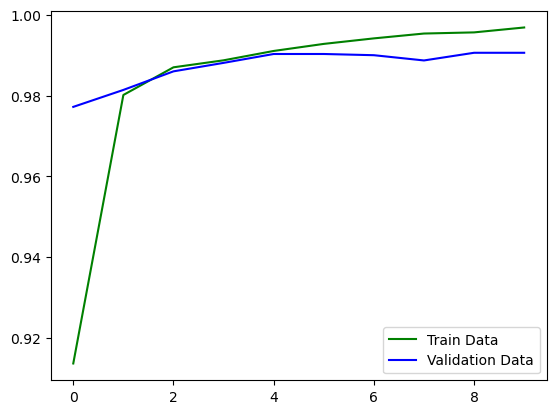

In [34]:
### Now let's plot The Accuracy of the train and validation in each epoch
plt.plot(history.history['accuracy'], color='green', label='Train Data')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Data')
plt.legend()